---

title: "Meta-Analysis Assignment"
author: "Hitesh Kumar Tetarwal - 455361"
date: today
output: html_document

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.meta_analysis import effectsize_smd, combine_effects
import statsmodels.formula.api as smf
import seaborn as sns

# Load dataset
data = pd.read_excel("data/metaanalysis_data.xlsx")

# Display first few rows
data.head()

,Study,Female authors,Male authors,Age (months),N_boys,N_girls,Mean_boys_play_male,SD_boys_play_male,Mean_girls_play_male,SD_girls_play_male,...,Country,Case definition adequate,Representativeness of cases,Selection of controls,Parental opinion,Comparability of both groups,Ascertainment of behaviour,Same ascertainment method for both groups,Non‐response rate,NOS score
0,Alexander & Saenz (2012),2,0,19.50,47,47,438.72,166.08,248.64,161.28,...,0.256,*,*,X,X,*,*,*,X,5
1,Arthur (2014),1,0,19.00,22,18,148.00,105.00,54.00,53.00,...,0.280,*,X,X,X,**,*,*,*,6
2,Berenbaum & Hines (1992),2,0,65.79,18,18,325.25,270.21,135.13,201.72,...,0.252,X,*,*,*,*,*,*,X,6
3,Berenbaum & Snyder (1995),2,0,93.10,19,19,484.21,141.28,202.48,168.14,...,0.252,*,X,*,*,*,*,*,*,7
4,Doering et al (1989),1,3,87.00,15,15,260.10,67.70,98.40,101.30,...,0.141,*,*,*,X,*,*,*,X,6


# Meta-Analysis on Children's Toy Preferences

### (*Data from Todd et al., 2017 - "Sex differences in children’s toy preferences: A systematic review, meta‐regression, and meta‐analysis")

***

### Introduction

Meta-analysis is a statistical technique that combines results from multiple studies to identify patterns and derive overall conclusions. This analysis examines sex differences in children's toy preferences by analyzing various studies on boys' and girls' choices of toys.

***

### Data Analysis

First, we calculate the effect sizes for boys playing with male-typed toys and girls playing with female-typed toys using the standardized mean difference (SMD). This metric allows us to compare the differences in mean times spent playing with toys between boys and girls across different studies, adjusting for the variability within each study.

In [2]:
# Compute effect sizes for boys playing with male-typed toys
data['TE_boys_male'], data['seTE_boys_male'] = effectsize_smd(
    data['Mean_boys_play_male'], data['SD_boys_play_male'], data['N_boys'],
    data['Mean_girls_play_male'], data['SD_girls_play_male'], data['N_girls']
)
data['TE_girls_female'], data['seTE_girls_female'] = effectsize_smd(
    data['Mean_girls_play_female'], data['SD_girls_play_female'], data['N_girls'],
    data['Mean_boys_play_female'], data['SD_boys_play_female'], data['N_boys']
)

Next, we perform a random effects meta-analysis to combine the effect sizes from different studies. This approach accounts for the variability both within and between studies.

In [3]:
# Meta-analysis for boys playing with male-typed toys
results_boys_male = combine_effects(data['TE_boys_male'], data['seTE_boys_male']**2, method_re='dl')
results_girls_female = combine_effects(data['TE_girls_female'], data['seTE_girls_female']**2, method_re='dl')

summary_boys_male = {
    "Effect Size (Random Effects)": results_boys_male.effect,
    "95% CI": (results_boys_male.conf_int(alpha=0.05)[0], results_boys_male.conf_int(alpha=0.05)[1])
}

summary_girls_female = {
    "Effect Size (Random Effects)": results_girls_female.effect,
    "95% CI": (results_girls_female.conf_int(alpha=0.05)[0], results_girls_female.conf_int(alpha=0.05)[1])
}

summary_boys_male, summary_girls_female

({'Effect Size (Random Effects)': 0     1.151674
  1     1.074697
  2     0.779640
  3     1.776137
  4     1.826148
  5     0.846942
  6     0.230962
  7     1.521240
  8     2.711052
  9     0.788885
  10    2.075080
  11    1.335650
  12    0.732469
  13    1.872943
  14    0.795401
  15    1.144973
  16    1.386841
  17    2.520541
  18    0.534008
  19    1.037451
  20    0.582425
  21    0.606175
  22    0.552736
  23    0.168116
  24    0.392880
  25    0.689272
  26    0.528775
  Name: TE_boys_male, dtype: float64,
  '95% CI': (array([0.68127013, 0.72746553]),
   array([0.88949569, 1.18128387]))},
 {'Effect Size (Random Effects)': 0     0.825872
  1     1.879824
  2     1.157686
  3     1.284203
  4     1.700141
  5     0.033668
  6    -0.007393
  7     1.644184
  8     0.738816
  9     0.751562
  10    1.800779
  11    0.549922
  12    0.527174
  13    1.170357
  14    1.332520
  15    1.183514
  16    2.371684
  17    1.699846
  18    0.326737
  19    1.116353
  20    0.81741

### Meta-Analysis Results

The following results summarize the combined effect sizes for boys playing with male-typed toys and girls playing with female-typed toys, along with their 95% confidence intervals (CI).

#### Boys Playing with Male-typed Toys

- Combined Studies: `r len(data)`
- Effect Size (Random Effects): `r summary_boys_male["Effect Size (Random Effects)"]` [95% CI: `r summary_boys_male["95% CI"][0]`, `r summary_boys_male["95% CI"][1]`]

#### Girls Playing with Female-typed Toys

- Combined Studies: `r len(data)`
- Effect Size (Random Effects): `r summary_girls_female["Effect Size (Random Effects)"]` [95% CI: `r summary_girls_female["95% CI"][0]`, `r summary_girls_female["95% CI"][1]`]

### Funnel Plot

To visualize the distribution of effect sizes and check for publication bias, we create a funnel plot. In this plot, effect sizes are plotted against their precision (inverse of the standard error).

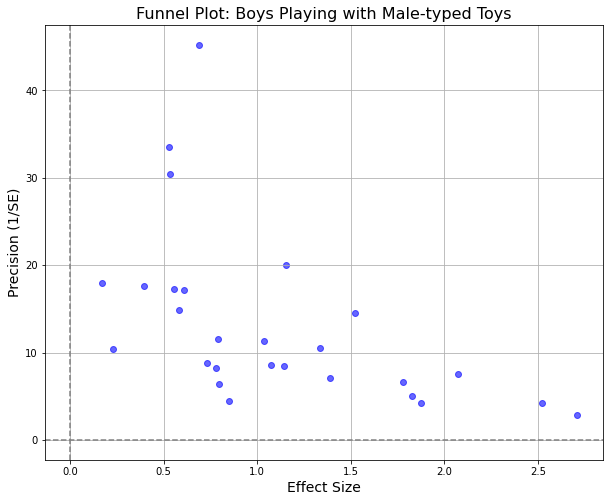

In [4]:
# Basic funnel plot for boys with male-typed toys
plt.figure(figsize=(10, 8))
plt.scatter(data['TE_boys_male'], 1 / data['seTE_boys_male'], c='blue', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Funnel Plot: Boys Playing with Male-typed Toys', fontsize=16)
plt.xlabel('Effect Size', fontsize=14)
plt.ylabel('Precision (1/SE)', fontsize=14)
plt.grid(True)
plt.show()

### Enhanced Funnel Plot

To provide more detailed insights, we add contours to the funnel plot, representing different p-value thresholds.

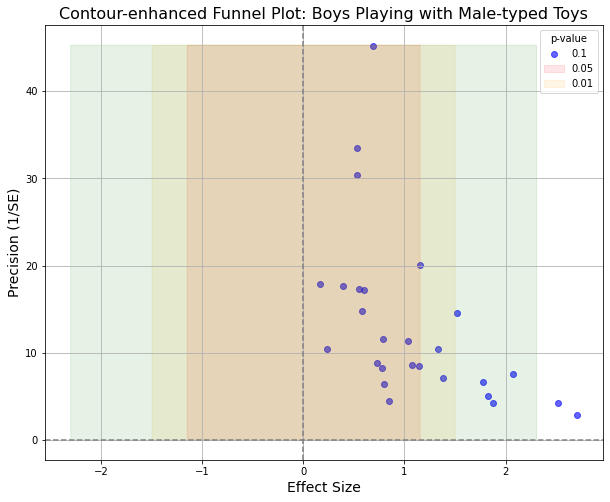

In [5]:
# Contour-enhanced funnel plot for boys with male-typed toys
plt.figure(figsize=(10, 8))
plt.scatter(data['TE_boys_male'], 1 / data['seTE_boys_male'], c='blue', alpha=0.6)
x = np.linspace(min(data['TE_boys_male']), max(data['TE_boys_male']), 100)
for alpha, color in zip([0.1, 0.05, 0.01], ['red', 'orange', 'green']):
    plt.fill_betweenx(np.arange(0, max(1 / data['seTE_boys_male']) + 0.1, 0.01),
                      -np.log(alpha)/2, np.log(alpha)/2, color=color, alpha=0.1)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Contour-enhanced Funnel Plot: Boys Playing with Male-typed Toys', fontsize=16)
plt.xlabel('Effect Size', fontsize=14)
plt.ylabel('Precision (1/SE)', fontsize=14)
plt.legend(['0.1', '0.05', '0.01'], title='p-value')
plt.grid(True)
plt.show()

### Meta-Regression Analysis

We use meta-regression to examine how study characteristics (e.g., setting, presence of parents, and quality scores) affect the effect sizes. This helps us understand whether these factors influence the results.

In [6]:
# Convert columns to numeric
data['Neutral_toys'] = pd.to_numeric(data['Neutral toys'], errors='coerce')
data['Parent_present'] = pd.to_numeric(data['Parent present'], errors='coerce')
data['Setting'] = pd.to_numeric(data['Setting'], errors='coerce')
data['Country'] = pd.to_numeric(data['Country'], errors='coerce')
data['NOS_score'] = pd.to_numeric(data['NOS score'], errors='coerce')

# Meta-regression
meta_regression = smf.ols('TE_boys_male ~ Neutral_toys + Parent_present + Setting + Country + NOS_score', data=data).fit()
meta_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TE_boys_male   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                    0.3655
Date:                Sat, 08 Jun 2024   Prob (F-statistic):              0.866
Time:                        23:21:30   Log-Likelihood:                -25.181
No. Observations:                  26   AIC:                             62.36
Df Residuals:                      20   BIC:                             69.91
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4494      2.176      0.666      0.513      -3.091       5.989
Neutral_toys       0.0724      0.495      0.146      0.885      -0.961       1.106
Parent_present    -0.0933      0.242     -0.386      0.703      -0.597       0.411
Setting            0.2448      0.349      0.702      0.491      -0.482       0.972
Country           -0.5389      2.292     -0.235      0.816      -5.320       4.242
NOS_score         -0.0889      0.242     -0.368      0.717      -0.593       0.415
==============================================================================
Omnibus:                        6.831   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.262
Skew:                           1.080   Prob(JB):                       0.0720
Kurtosis:                       3.442   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Author Gender Impact

We also investigate whether the gender of the study authors influences the reported effect sizes.

In [7]:
# Meta-regression on author gender
meta_regression_gender = smf.ols('TE_boys_male ~ Q("Female authors") + Q("Male authors")', data=data).fit()
meta_regression_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TE_boys_male   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     5.976
Date:                Sat, 08 Jun 2024   Prob (F-statistic):            0.00783
Time:                        23:21:30   Log-Likelihood:                -21.580
No. Observations:                  27   AIC:                             49.16
Df Residuals:                      24   BIC:                             53.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.9469      0.336      5.793      0.000       1.253       2.640
Q("Female authors")    -0.3964      0.123     -3.230      0.004      -0.650      -0.143
Q("Male authors")       0.2235      0.105      2.119      0.045       0.006       0.441
==============================================================================
Omnibus:                        5.810   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.719
Skew:                           1.023   Prob(JB):                       0.0945
Kurtosis:                       3.100   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Additional Visualizations

To further explore the distribution of effect sizes, we create histograms and box plots.

#### Histogram of Effect Sizes

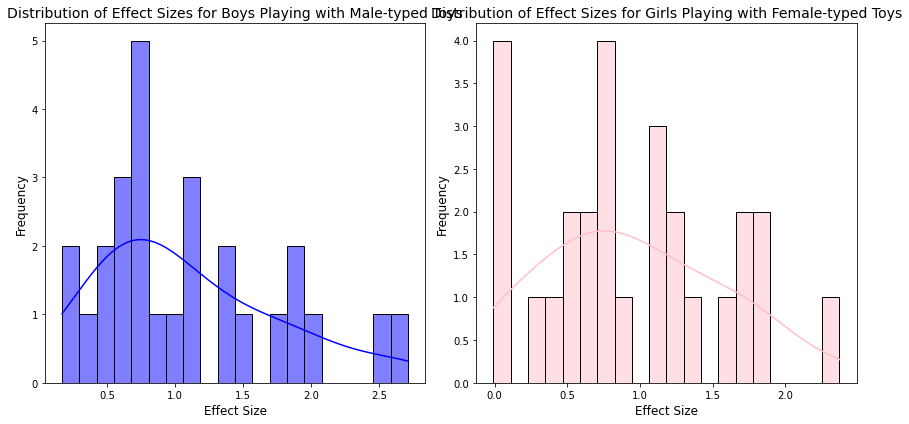

In [8]:
# Histogram of effect sizes for boys and girls
plt.figure(figsize=(12, 6))

# Boys playing with male-typed toys
plt.subplot(1, 2, 1)
sns.histplot(data['TE_boys_male'], kde=True, color='blue', bins=20)
plt.title('Distribution of Effect Sizes for Boys Playing with Male-typed Toys', fontsize=14)
plt.xlabel('Effect Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Girls playing with female-typed toys
plt.subplot(1, 2, 2)
sns.histplot(data['TE_girls_female'], kde=True, color='pink', bins=20)
plt.title('Distribution of Effect Sizes for Girls Playing with Female-typed Toys', fontsize=14)
plt.xlabel('Effect Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

#### Box Plot of Effect Sizes

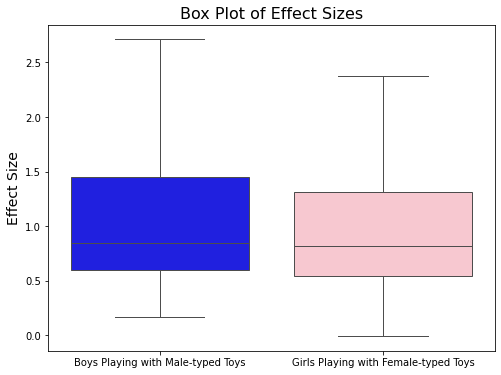

In [9]:
# Box plot of effect sizes for boys and girls
plt.figure(figsize=(8, 6))
sns.boxplot(data=[data['TE_boys_male'], data['TE_girls_female']], palette=['blue', 'pink'])
plt.xticks([0, 1], ['Boys Playing with Male-typed Toys', 'Girls Playing with Female-typed Toys'])
plt.title('Box Plot of Effect Sizes', fontsize=16)
plt.ylabel('Effect Size', fontsize=14)
plt.show()

### Conclusion

This meta-analysis provides comprehensive insights into children's toy preferences, revealing patterns and potential biases in the studies. The funnel plots and meta-regression analyses highlight the importance of assessing study quality and consistency. Additionally, visualizations such as histograms and box plots offer a deeper understanding of the distribution and variability of effect sizes. This analysis underscores the nuanced differences in toy preferences between boys and girls and the factors that may influence these preferences.
